Packages:
1. statsmodels:  statsmodels.tsa.stattools
   --> ploting ACF & PACF, dickey-fuller-test
2. pytrends= for getting google trend using payload(contain info.)
3. matplotlib.pyplot= for ploting graphs

In [1]:
!pip install PyDrive

     |████████████████████████████████| 993kB 2.8MB/s 
  Created wheel for PyDrive: filename=PyDrive-1.3.1-cp36-none-any.whl size=27437 sha256=5d853209d4f9a28aed0f363388ccc868a2a592eedc7090bcf479cd364d0647af
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
#Installing required packages
import pandas as pd
import datetime as dt
from collections import defaultdict
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [0]:
#Conecting google drive to google co-lab
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
#LOADING CSV FILE FROM GOOGLE DRIVE

link = 'https://drive.google.com/open?id=1TVgbPXsvMr7BzvweArubPcR5AHSa_zw9'
fluff, id = link.split('=')  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ToteBag_2004_19.csv.csv')
data_x=pd.read_csv('ToteBag_2004_19.csv.csv',encoding='latin-1')
time_data=data_x.loc[:, ~data_x.columns.str.contains('^Unnamed')]
time_data.rename(columns={'tote bag: (United States)': 'Volume'}, inplace=True)
print(time_data.head())

     Month  Volume
0  2004-01      35
1  2004-02      29
2  2004-03      33
3  2004-04      33
4  2004-05      30


Manual-for-Google-Trend:  https://pypi.org/project/pytrends/#interest-over-time

In [5]:
#Getting data from Google trend API
!pip install pytrends

1. gprop: images, news, youtube or froogle
2. geo: 'US-AL', 'GB-ENG', 'US'
3. cat: "https://www.google.com/trends/explore#q=pizza&cat=71"     so cat='71'
4. kw_list: contain the Keyword or list of Keywords max =5
5. timeframe: 'today 5-y', 'all', '2016-12-14 2017-01-25' (Specific date),

In [6]:
#API to fetch the search volume of a specific "keyword" using Google trend
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)

#Building the Payload
# kw_list = ['Apparel', 'Redwear', 'Caps', 'Sunglasses']
kw_list = ['tote bag']
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='US', gprop='')
time_data=pytrends.interest_over_time()
time_data.head(8)
# df=pytrends.get_historical_interest(kw_list, year_start=2015, month_start=1, year_end=2018, month_end=12, cat=0, geo='US', gprop='', sleep=0)

,tote bag,isPartial
date,,
2014-08-31,66,False
2014-09-07,63,False
2014-09-14,56,False
2014-09-21,60,False
2014-09-28,47,False
2014-10-05,54,False
2014-10-12,52,False
2014-10-19,58,False


**1. Building Time Series Object**

In [0]:
time_data=pd.DataFrame(time_data['tote bag'].resample('MS').mean())

In [0]:
# time_data.set_index("Month", inplace = True, drop=True)
# time_data=time_data[['tote bag']]
time_data.rename(columns={'tote bag': 'Volume'}, inplace=True)
time_data=time_data.loc['2015-01-01':'2019-08-01']

In [0]:
ts=time_data.copy()

In [10]:
ts.head(5)

,Volume
date,
2015-01-01,59.25
2015-02-01,51.25
2015-03-01,60.00
2015-04-01,62.25
2015-05-01,60.40


1. Visually check for trends, i.e mean and Variance changing over time

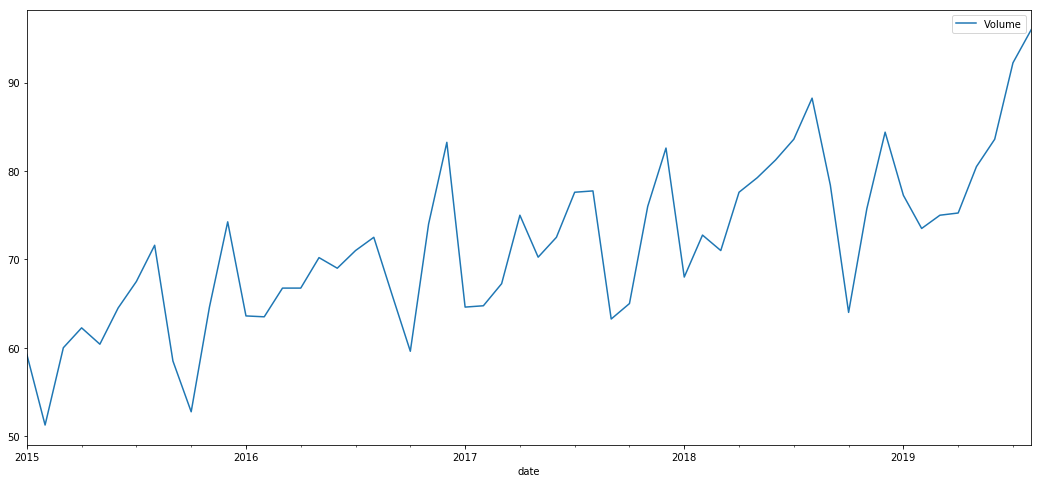

In [11]:
# Ploting 5 year data
import matplotlib.pyplot as plt 
import numpy as np 
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
ts.plot()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24ffe740b8>]],
      dtype=object)

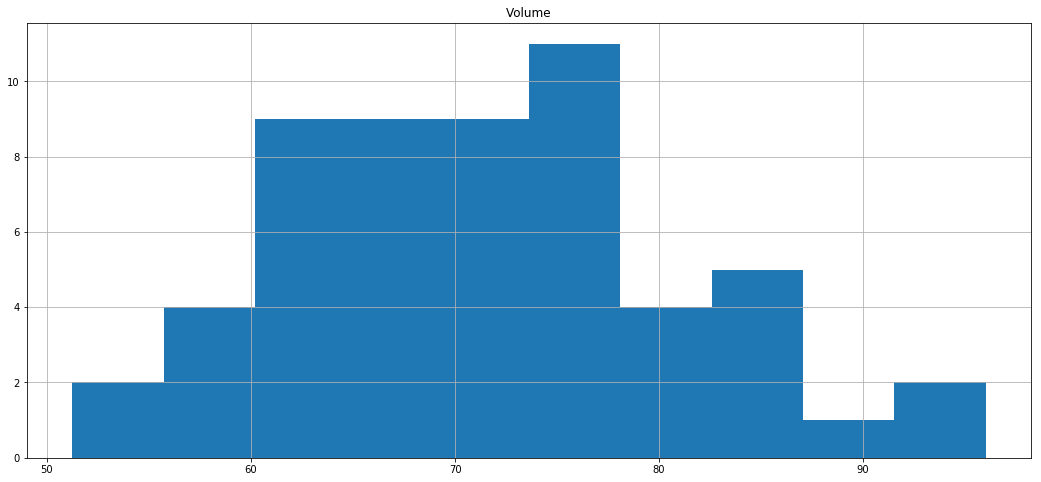

In [12]:
#If not a bell shaped, its not statinary
time_data.hist()

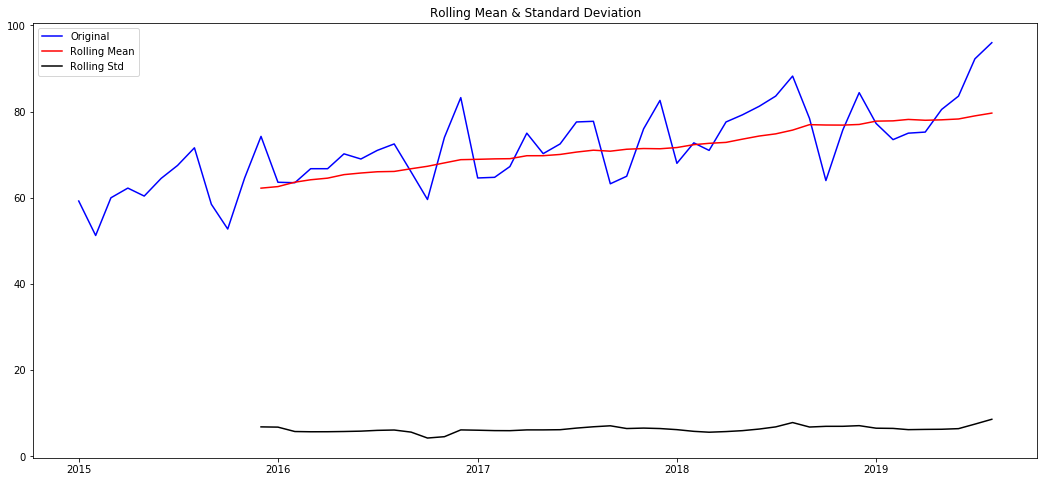

In [13]:
#1. Checking startionarity
#Determing rolling statistics
rolmean= ts.rolling(window=12).mean()
rolstd= ts.rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(ts, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [0]:
# one, two, three = np.split(time_data['Volume'].sample(frac=1), [int(.25*len(time_data['Volume'])), int(.75*len(time_data['Volume']))])

# mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
# var1, var2, var3 = one.var(), two.var(), three.var()
 
# print(mean1, mean2, mean3)
# print(var1, var2, var3)

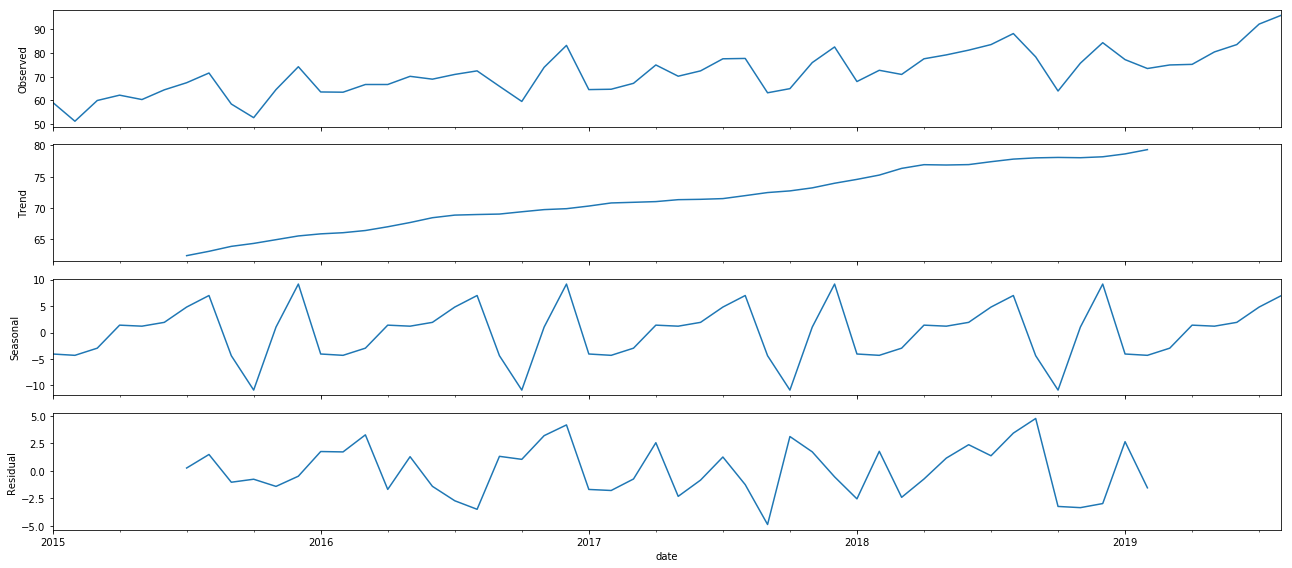

In [15]:
#2. Decompose and check for trend
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()

1. Seasonal decomposition using moving average
2. Perfect Seasonality seen is because of seasonal adjustment factor. 
{“additive”, “multiplicative”}
3. For each months it is having average-correction-value
4. How Decomposition work ?
5. Moving average is used to remove noise, How ?

In [16]:
#3. Dickey fuller test for trend
import pandas as pd
from statsmodels.tsa.stattools import adfuller
print("Result of Dickey-Fuller Test: ")
dftest= adfuller(ts['Volume'], autolag= 'AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', '#Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

Result of Dickey-Fuller Test: 
Test Statistic                  -0.749771
p-value                          0.833433
#Lags Used                      11.000000
#Number of Observations Used    44.000000
Critical Value (1%)             -3.588573
Critical Value (5%)             -2.929886
Critical Value (10%)            -2.603185
dtype: float64


1. **Diffrencing: In this method, we compute the difference of consecutive terms in the series.**

    train['#Passengers_diff'] = train['#Passengers'] - train['#Passengers'].shift(1)
2. **Seasonal Diffrencing: we calculate the difference between an observation and a previous observation from the same season.**

    train['#Passengers_diff'] = train['#Passengers'] - train['#Passengers']
.shift(n)
3. **Transformation: Log transformation**

    train['#Passengers_log'] = np.log(train['#Passengers'])
train['#Passengers_log_diff'] = train['#Passengers_log'] - train['#Passengers_log'].shift(1)

For Stationarity: p-value around 0.5 "Critical value" should be more than "Test statistic"

Ho: Series is not stationary "Fail to reject" Ho hypothesis = i.e accept Ho hypothesis(means, Series is not stationary).

1. p-value > 0.05
2. Test statistic > critical value

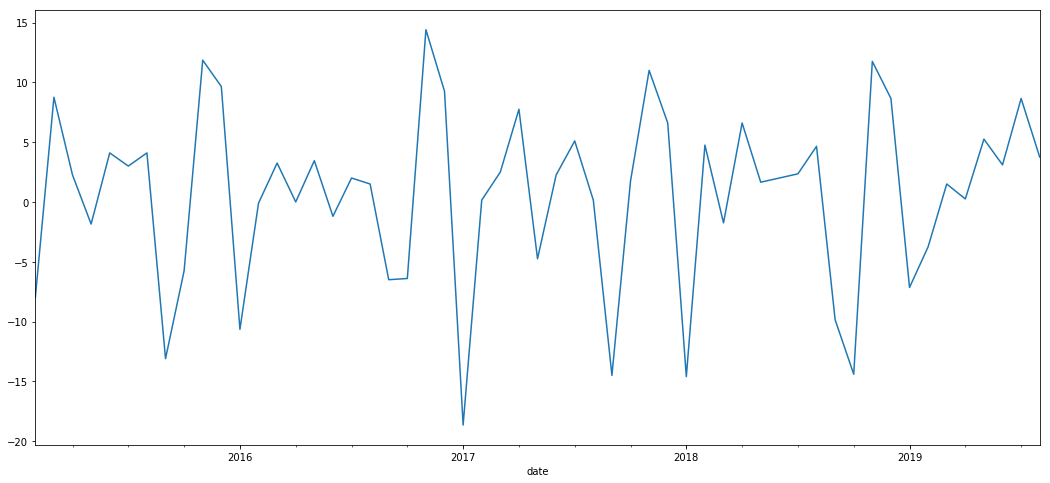

In [17]:
#Consecutive diffrencing
ts['diff'] = ts['Volume'] - ts['Volume'].shift(1)
ts.dropna(axis=0, inplace=True)
ts['diff'].plot()

In [18]:
#3. Dickey fuller test for trend after diffrencing
import pandas as pd
from statsmodels.tsa.stattools import adfuller
print("Result of Dickey-Fuller Test: ")
dftest= adfuller(ts['diff'], autolag= 'AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', '#Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

Result of Dickey-Fuller Test: 
Test Statistic                 -5.691042e+00
p-value                         8.070083e-07
#Lags Used                      1.000000e+01
#Number of Observations Used    4.400000e+01
Critical Value (1%)            -3.588573e+00
Critical Value (5%)            -2.929886e+00
Critical Value (10%)           -2.603185e+00
dtype: float64


In [0]:
#Seasonal diffrencing
# ts['seasonal_diff'] = ts['Volume'] - ts['Volume'].shift(12)
# ts.dropna(axis=0, inplace=True)
# ts['seasonal_diff'].plot()


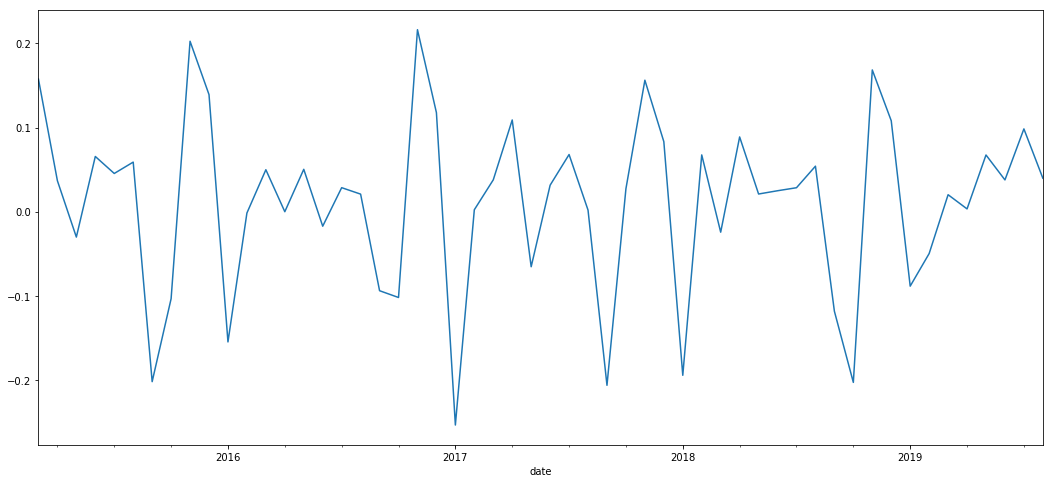

In [19]:
#Transformation
ts['Volume_log'] = np.log(ts['Volume'])
ts['Volume_log_diff'] = ts['Volume_log'] - ts['Volume_log'].shift(1)
ts['Volume_log_diff'].dropna().plot()

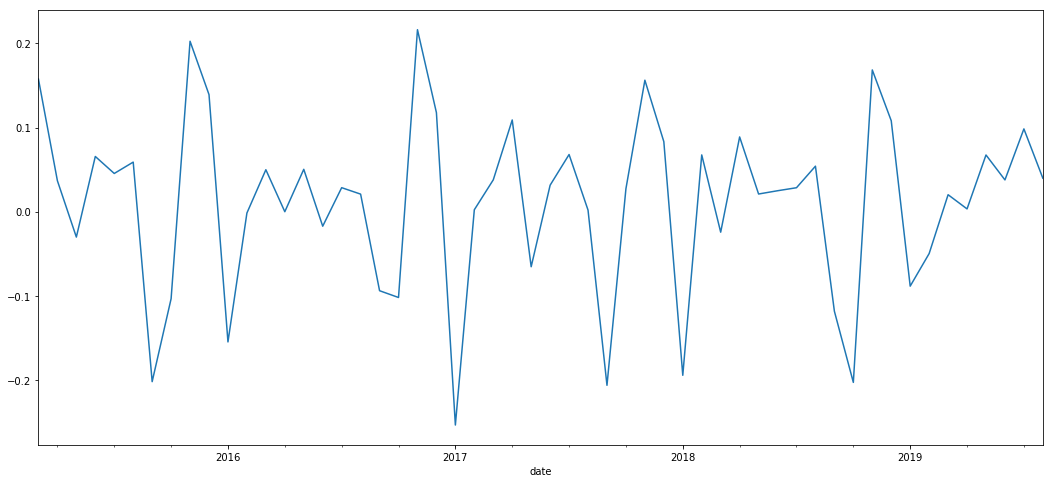

In [20]:
(np.log(ts['Volume']) - np.log(ts['Volume']).shift(1)).dropna().plot()

In [21]:
#3. Dickey fuller test for trend after diffrencing
import pandas as pd
from statsmodels.tsa.stattools import adfuller
print("Result of Dickey-Fuller Test: ")
dftest= adfuller((np.log(ts['Volume']) - np.log(ts['Volume']).shift(1)).dropna(), autolag= 'AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', '#Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

Result of Dickey-Fuller Test: 
Test Statistic                  -5.166451
p-value                          0.000010
#Lags Used                      10.000000
#Number of Observations Used    43.000000
Critical Value (1%)             -3.592504
Critical Value (5%)             -2.931550
Critical Value (10%)            -2.604066
dtype: float64


Since, Test Statistic is "Less than" Critical value
and,   p-value < 0.05  hence we reject the Null hypothesis. 
Now, ts is stationary

In [22]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts['Volume'], nlags=24)
lag_pacf = pacf(ts['Volume'], nlags=24, method='ols')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Note:Since 95.0% of a normally distributed population is within 1.96 (95% is within about 2) standard deviations of the mean

Text(0.5, 1.0, 'Autocorrelation Function')

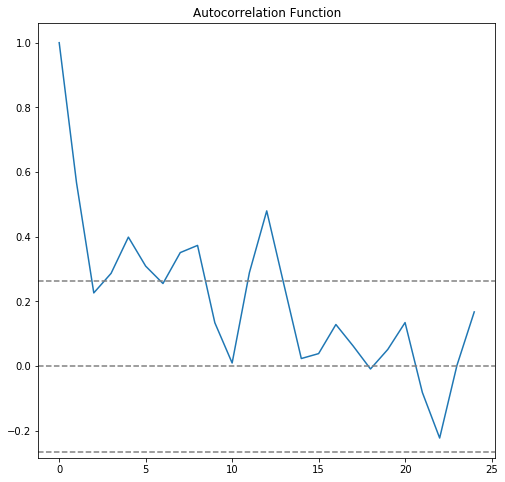

In [23]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts['Volume'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts['Volume'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [0]:
# #Plot PACF:
# plt.subplot(122)
# plt.plot(lag_pacf)
# plt.axhline(y=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
# plt.title('Partial Autocorrelation Function')
# plt.tight_layout()

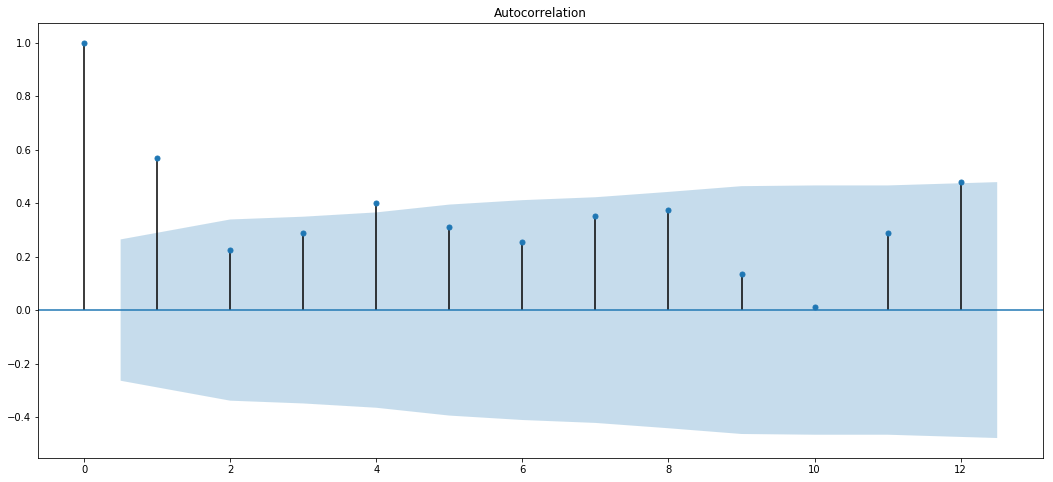

In [25]:
plot_acf(ts['Volume'], lags=12)
plt.show()

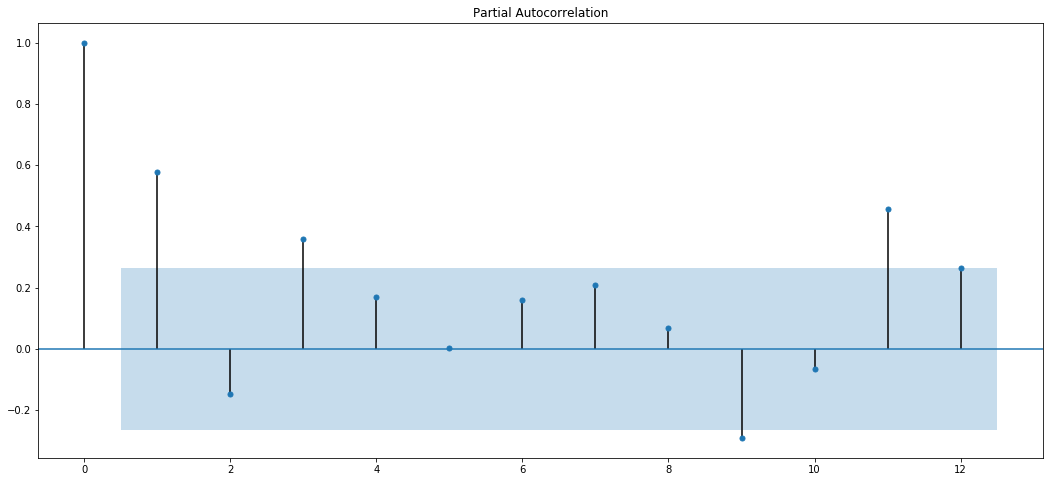

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ts['Volume'], lags=12)
plt.show()

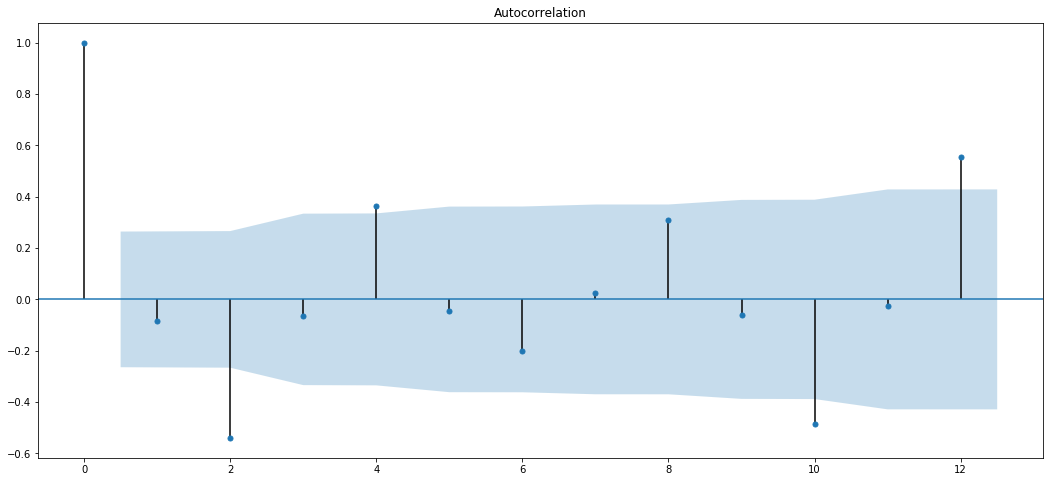

In [27]:
plot_acf(ts['diff'], lags=12)
plt.show()

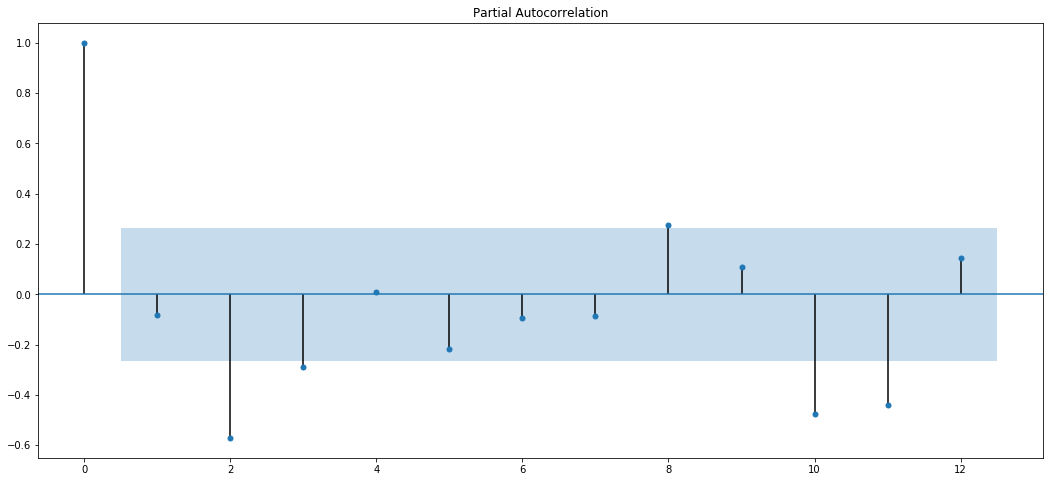

In [28]:
#acf on statinary time series

plot_pacf(ts['diff'], lags=12)
plt.show()

In [29]:
!pip install pyramid-arima

     |████████████████████████████████| 604kB 2.8MB/s 


In [34]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(ts['Volume'], start_p=1, start_q=1, max_p=3, max_q=3, m=10,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 10); AIC=310.510, BIC=319.316, Fit time=0.832 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 10); AIC=346.740, BIC=350.262, Fit time=0.013 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 10); AIC=316.631, BIC=323.676, Fit time=0.252 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 10); AIC=312.488, BIC=319.533, Fit time=0.457 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 10); AIC=299.925, BIC=310.492, Fit time=0.951 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 10); AIC=306.384, BIC=315.190, Fit time=0.667 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 10); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 10); AIC=335.479, BIC=342.523, Fit time=0.249 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 10); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 10); AIC=304.8

In [35]:
stepwise_model

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(1, 1, 1, 10), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

In [36]:
print(stepwise_model.aic())

294.9978350049977


In [0]:
#Train, test split
train = ts['Volume'].loc['2015-03-01':'2018-12-01']
test = ts['Volume'].loc['2019-01-01 ':]

In [44]:
#Training the model
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(1, 1, 1, 10), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

In [0]:
#prediction
future_forecast = stepwise_model.predict(n_periods=8)

In [48]:
future_forecast

array([81.30553706, 78.76793114, 80.36222216, 81.26464317, 78.26025579,
       81.63923767, 80.57378791, 85.04369605])

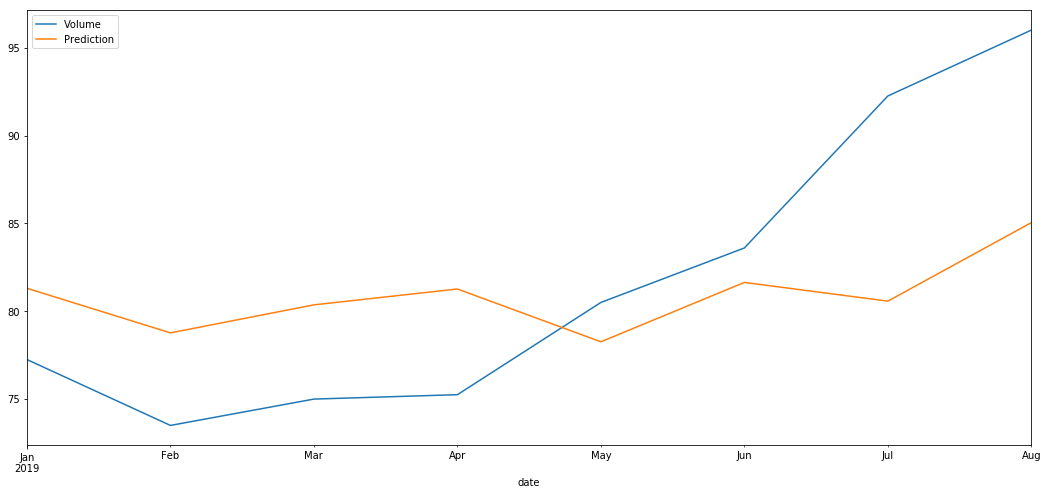

In [51]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

In [52]:
test

date
2019-01-01    77.25
2019-02-01    73.50
2019-03-01    75.00
2019-04-01    75.25
2019-05-01    80.50
2019-06-01    83.60
2019-07-01    92.25
2019-08-01    96.00
Freq: MS, Name: Volume, dtype: float64

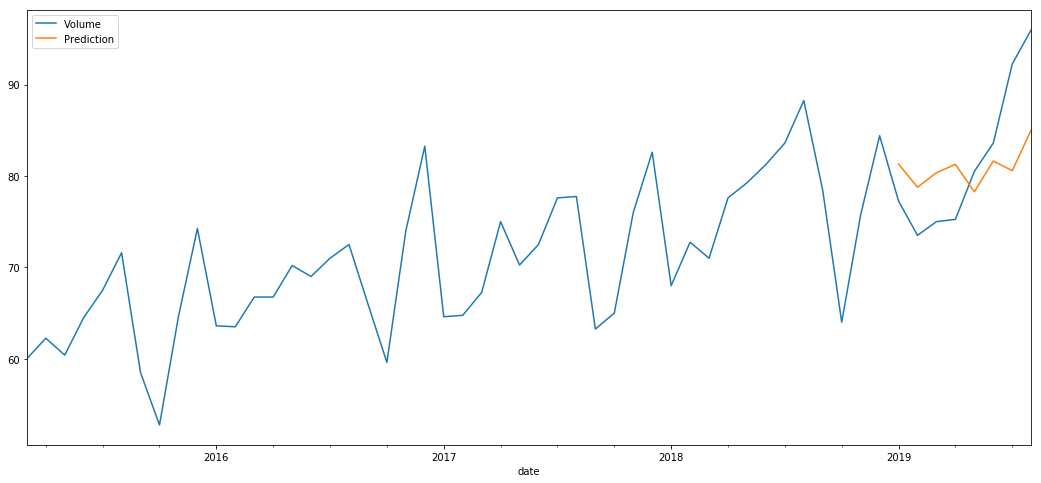

In [53]:
pd.concat([ts['Volume'],future_forecast],axis=1).plot()